# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cols = ['ID', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Normal_Nuclei','Bland_Chromatin', 'Mitoses','Class']
# Load data set and display first few observations
ds = pd.read_csv("breast-cancer-wisconsin.data.txt", header = None)
ds.columns = cols
ds.head()

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
ds.shape

(699, 11)

In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
ds.dtypes

ID                              int64
Clump_Thickness                 int64
Cell_Size                       int64
Cell_Shape                      int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Normal_Nuclei                   int64
Bland_Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
ds.shape

(699, 11)

In [7]:
ds.describe()

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Normal_Nuclei,Bland_Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
# Bare_Nuclei is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(ds.Bare_Nuclei.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['Bare_Nuclei'] == False]   # from temp take only those rows where hp has false



,Bare_Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
temp = pd.DataFrame(ds.Bare_Nuclei.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['Bare_Nuclei'] == False].count()   # from temp take only those rows where Bare_Nuclei has false

Bare_Nuclei    16
dtype: int64

In [14]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Since the Bare_Nuclei values are skewed with extreme valuse 1 & 10 havin highest and second highest frequency.
# Using Median for imputation. 
bc_ds = ds.replace('?', np.nan)
bc_ds = bc_ds.apply(lambda x: x.fillna(x.median()),axis=0)
bc_ds.head(30)

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [15]:
# Check for correlation of variable

bc_ds['Bare_Nuclei'] = bc_ds['Bare_Nuclei'].astype('int64')  

X = bc_ds.drop(['ID','Class'], axis=1)
# Define categorical outcome 
y = bc_ds['Class']

# X.head()
# X.dtypes
X.corr()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses
Clump_Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Normal_Nuclei,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Bland_Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


In [16]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

X_target = bc_ds.drop(['ID'], axis=1)
# X.head()
# X.dtypes
X_target.corr()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses,Class
Clump_Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal_Nuclei,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland_Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


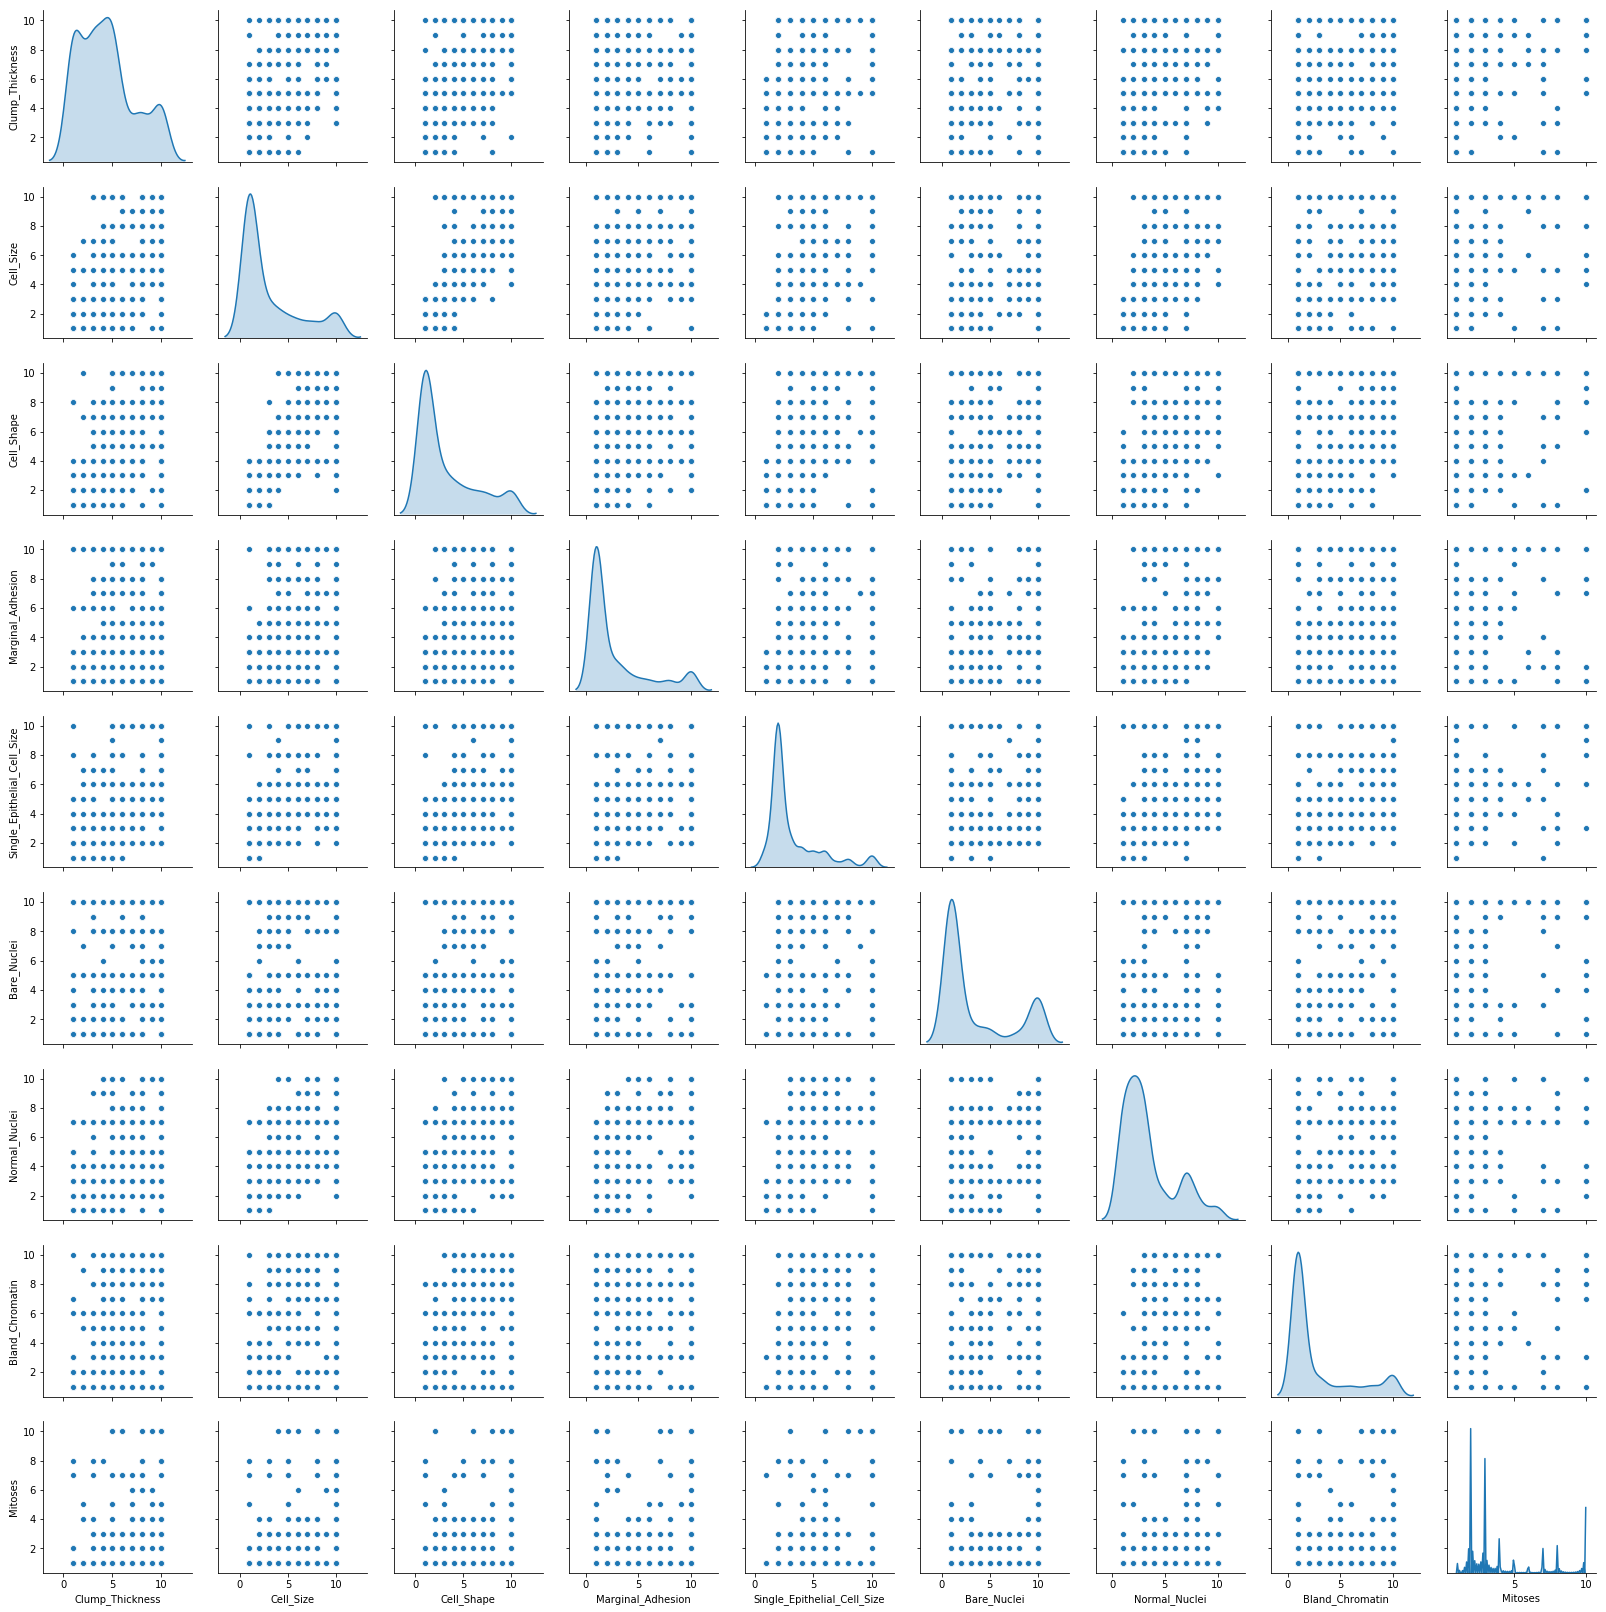

In [18]:
#Let us check for pair plots
sns.pairplot(X, diag_kind='kde')

In [19]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

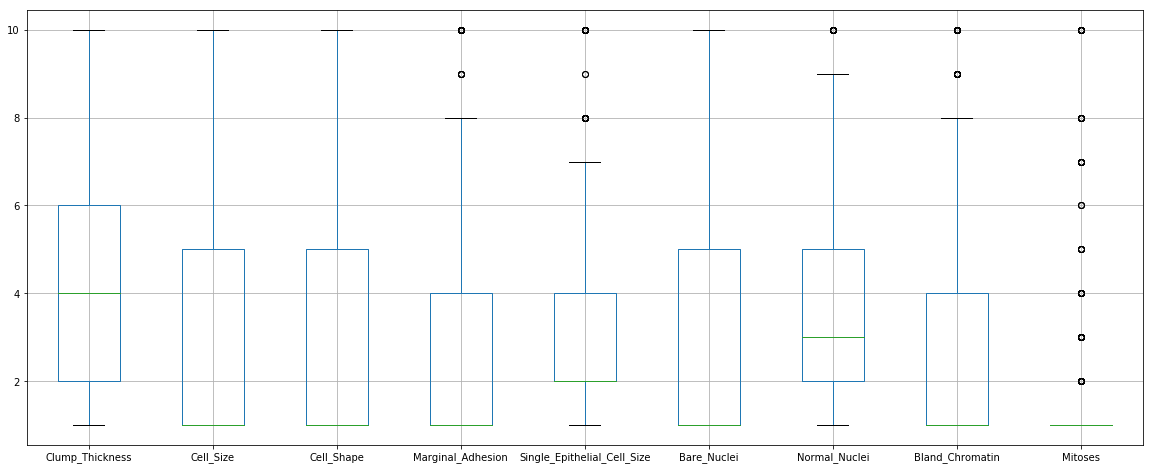

In [20]:
# We could see most of the outliers are now removed.
X.boxplot(figsize = (20, 8))

In [21]:
# there seems to be too many outliers in column "Miteses"
X['Mitoses'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [22]:
X['Mitoses'] = np.where(X['Mitoses'] >= 5, 5, X['Mitoses'])

In [23]:
X['Mitoses'].value_counts()

1    579
5     40
2     35
3     33
4     12
Name: Mitoses, dtype: int64

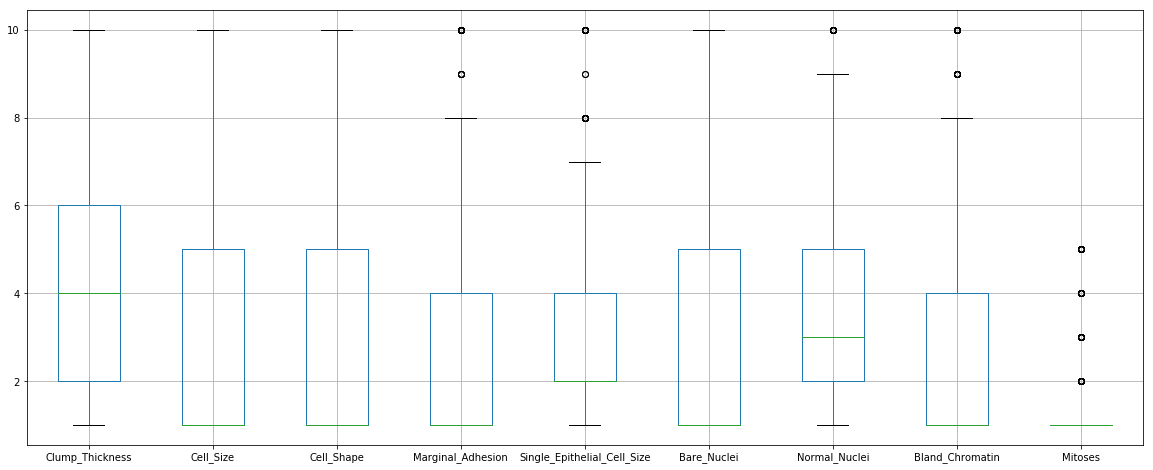

In [24]:
X.boxplot(figsize = (20, 8))

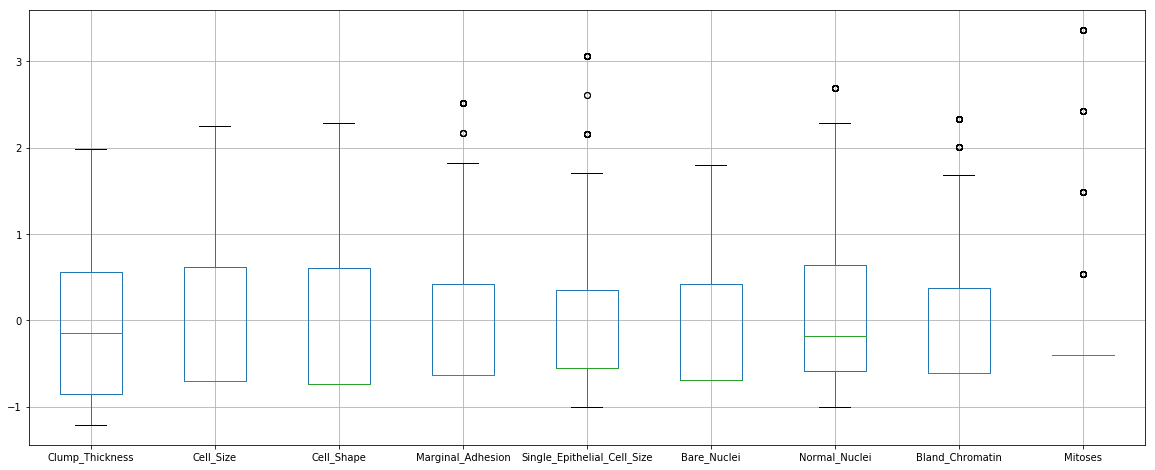

In [25]:
# Standardize feature space to have mean 0 and variance 1
X_std = (X - np.mean(X,axis = 0)) / np.std(X,axis = 0)

X_std.shape
X_std.boxplot(figsize= (20, 8))

# Q6 Create a covariance matrix for identifying Principal components

In [160]:
# PCA
# Step 1 - Create covariance matrix

In [29]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)

# Note that covariance matrix is 9x9 since their are 9 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.39012503]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.49803826]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.47382672]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.46290033]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.49237757]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.41418324]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.38632682]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.46429499]
 [0.39012503 0.49803826 0.47382672 0.46290033 0.49237757 0.41418324
  0.38632682 0.46429499 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [30]:
# Step 2- Get eigen values and eigen vector

In [31]:
# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 9x9 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 9x1 matrix
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.30158616  0.15589088 -0.86249128 -0.00254587 -0.04210457 -0.0511407
  -0.2374984   0.28259914  0.01379148]
 [-0.37919462  0.07289043  0.03231929 -0.7357735   0.20248761  0.12297479
   0.44583763  0.08475154 -0.21543724]
 [-0.37538325  0.11576924 -0.02183517  0.66509586  0.17343337  0.09181431
   0.58785764  0.01800773 -0.13581508]
 [-0.33165042  0.01511184  0.40019284  0.04412075 -0.46739717  0.01485214
  -0.10875627  0.69550798  0.11592547]
 [-0.33392831 -0.12487253  0.13734687  0.06539846  0.42600596  0.66037952
  -0.44370148 -0.06620395  0.175845  ]
 [-0.33323612  0.19238655 -0.03568837 -0.07454199 -0.56595775  0.14139102
   0.08898695 -0.57518143  0.40750335]
 [-0.34420876  0.25352775  0.19797571  0.06090785 -0.06322918 -0.26271306
  -0.4179613  -0.27792458 -0.67036561]
 [-0.33421844 -0.0160086   0.14840862 -0.02116459  0.4135858  -0.66085019
  -0.08295512 -0.04711501  0.49868942]
 [-0.24822686 -0.91630552 -0.11434967  0.0184545  -0.1784554  -0.1085252

# Q8 Find variance and cumulative variance by each eigen vector

In [32]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
# print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)
print('EigenVectors in descending order of eigenValues: \n%s' %eigvectors_sorted)


Eigenvalues in descending order: 
[5.950494462679899, 0.7093033614767058, 0.5400948897330594, 0.47926382543732315, 0.38342576817965257, 0.3065179995325194, 0.2923925732240006, 0.2626156816412691, 0.08878542090364924]
EigenVectors in descending order of eigenValues: 
[array([-0.30158616, -0.37919462, -0.37538325, -0.33165042, -0.33392831,
       -0.33323612, -0.34420876, -0.33421844, -0.24822686]), array([ 0.15589088,  0.07289043,  0.11576924,  0.01511184, -0.12487253,
        0.19238655,  0.25352775, -0.0160086 , -0.91630552]), array([-0.86249128,  0.03231929, -0.02183517,  0.40019284,  0.13734687,
       -0.03568837,  0.19797571,  0.14840862, -0.11434967]), array([-0.04210457,  0.20248761,  0.17343337, -0.46739717,  0.42600596,
       -0.56595775, -0.06322918,  0.4135858 , -0.1784554 ]), array([-0.0511407 ,  0.12297479,  0.09181431,  0.01485214,  0.66037952,
        0.14139102, -0.26271306, -0.66085019, -0.10852522]), array([ 0.28259914,  0.08475154,  0.01800773,  0.69550798, -0.06620

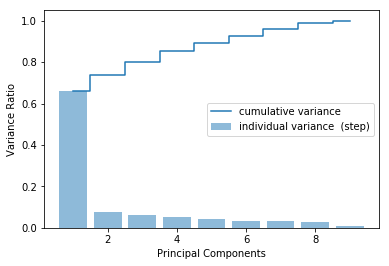

In [33]:
# Cumulative Variance
# an array of variance explained by each eigen vector... there will be 9 entries as there are 9 eigen vectors)

tot = sum(eigenvalues)
var_step = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
# an array of cumulative variance. There will be 9 entries with 9 th entry cumulative reaching almost 1 (100%)
cum_var = np.cumsum(var_step)  

plt.bar(range(1,10), var_step, alpha=0.5, align='center', label='individual variance  (step)')
plt.step(range(1,10),cum_var, where= 'mid', label='cumulative variance')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()


# The plot shows that the first principal component alone accounts for 60+ percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 75% percent of the variance 
# in the data. 

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [34]:
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# Choosing to take 4 PC's as top 4 Principal Components are taking us to about 85% representation

# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 9 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [35]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

# Q10 Find correlation between components and features

In [36]:
P_reduce

array([[-0.30158616, -0.37919462, -0.37538325, -0.33165042, -0.33392831,
        -0.33323612, -0.34420876, -0.33421844, -0.24822686],
       [ 0.15589088,  0.07289043,  0.11576924,  0.01511184, -0.12487253,
         0.19238655,  0.25352775, -0.0160086 , -0.91630552],
       [-0.86249128,  0.03231929, -0.02183517,  0.40019284,  0.13734687,
        -0.03568837,  0.19797571,  0.14840862, -0.11434967],
       [-0.04210457,  0.20248761,  0.17343337, -0.46739717,  0.42600596,
        -0.56595775, -0.06322918,  0.4135858 , -0.1784554 ]])

In [37]:
Proj_cor_df = pd.DataFrame(P_reduce, columns=X.columns)
Proj_cor_df

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nuclei,Bland_Chromatin,Mitoses
0,-0.301586,-0.379195,-0.375383,-0.331650,-0.333928,-0.333236,-0.344209,-0.334218,-0.248227
1,0.155891,0.072890,0.115769,0.015112,-0.124873,0.192387,0.253528,-0.016009,-0.916306
2,-0.862491,0.032319,-0.021835,0.400193,0.137347,-0.035688,0.197976,0.148409,-0.114350
3,-0.042105,0.202488,0.173433,-0.467397,0.426006,-0.565958,-0.063229,0.413586,-0.178455


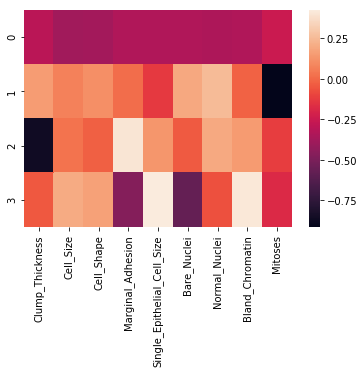

In [38]:
sns.heatmap(Proj_cor_df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


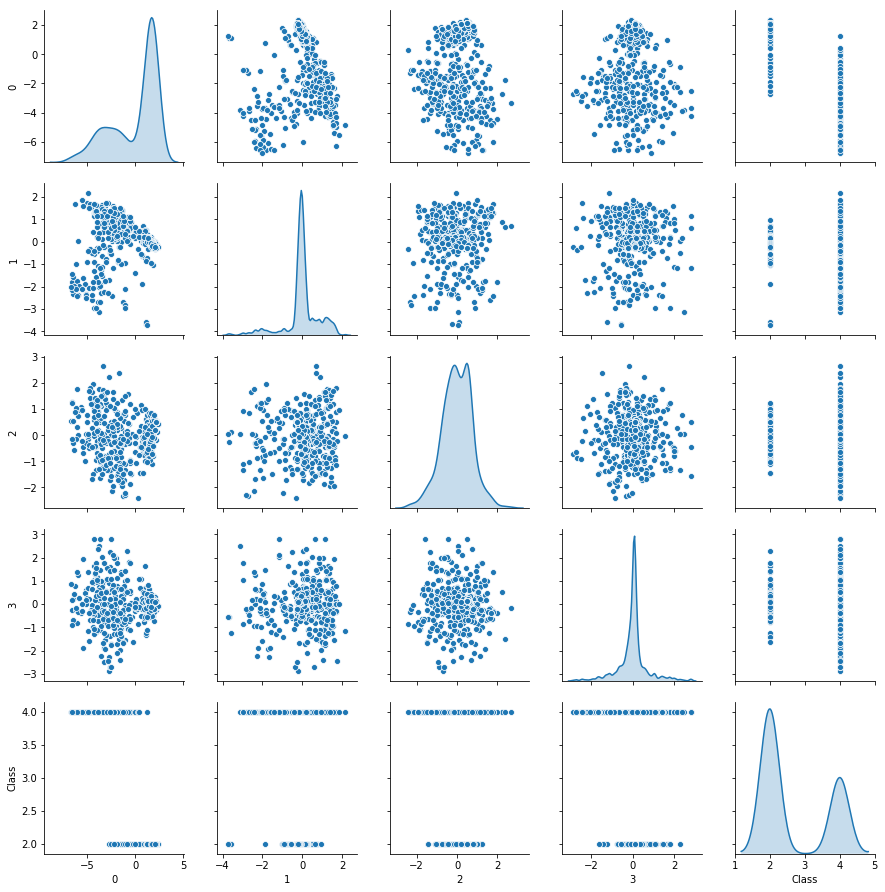

In [39]:
#Let us check it visually
Proj_data_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_df, diag_kind='kde') 

In [40]:
pca = PCA(n_components=4)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
X_pca = pca.transform(X_std)
X_pca.shape

(699, 4)

In [42]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_pca_train, y_pca_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [43]:
model.score(X_pca_test, y_pca_test)

1.0

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [45]:
jks = pd.read_csv("jokes.csv")
jks.drop(['NumJokes'], axis=1, inplace=True)
jks.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [46]:
ratings = jks.head(200)
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [47]:
ratings.columns = range(100);
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [48]:
ratings = ratings.replace(99.00, 0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [49]:
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [50]:
jks_mean = ratings_diff.mean(axis=0)
jks_mean

array([ 0.00000000e+00,  1.77635684e-17, -2.88657986e-17, -1.33226763e-17,
       -2.22044605e-18, -6.66133815e-18,  6.66133815e-18,  1.66533454e-17,
       -5.32907052e-17,  8.88178420e-18, -3.55271368e-17, -4.44089210e-17,
       -8.88178420e-18,  3.55271368e-17, -8.88178420e-18, -1.19904087e-16,
        1.99840144e-17,  2.55351296e-17,  8.88178420e-18,  2.66453526e-17,
        1.11022302e-16, -1.77635684e-17, -2.66453526e-17,  4.44089210e-17,
       -1.33226763e-17, -5.32907052e-17, -1.77635684e-17,  8.88178420e-18,
        0.00000000e+00,  0.00000000e+00,  3.55271368e-17, -1.06581410e-16,
        4.44089210e-18,  4.44089210e-18, -8.88178420e-18,  1.77635684e-17,
        1.77635684e-17, -2.22044605e-17, -1.77635684e-17,  1.11022302e-17,
        0.00000000e+00,  1.33226763e-17,  3.10862447e-17, -2.66453526e-17,
        8.88178420e-18, -1.33226763e-17, -1.77635684e-17,  7.77156117e-17,
       -1.77635684e-17,  7.10542736e-17, -8.88178420e-18, -8.88178420e-18,
       -4.44089210e-18,  

In [51]:
jks_mean.argsort()[:-10:-1]
# top 10 joke ids

array([53, 20, 47, 49, 64, 99, 83, 23, 73])